In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
from pathlib import Path
import seaborn as sns

sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
path = Path.cwd().parent / "data/r2.csv"
data = pd.read_csv(path)

Let's take a look how the data looks like

In [3]:
data.head()

,id,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,1,9.6,0.081,0.44,0.98920,0.777174,0.101811,0.615949,0.335220,0.072921,0.550654,0.321462,0.742844,0.120581,0.762964,9.7,23.0,3.49,4.248582,2.2,4.63,67.0,0.600
1,2,11.9,0.074,0.01,1.00371,0.682378,0.702689,0.595187,0.738317,0.079608,0.360016,0.668480,0.158404,0.377644,0.704609,7.9,33.0,3.44,6.365523,2.0,4.57,41.0,0.725
2,3,9.6,0.084,0.49,1.00870,0.477076,0.491814,0.123014,0.491648,0.112396,0.113222,0.413835,0.388120,0.513607,0.334223,9.2,23.0,3.38,5.094680,2.5,4.57,75.0,0.470
3,4,11.0,0.081,0.33,1.00490,0.745925,0.741657,0.769887,0.298042,0.167762,0.503632,0.839153,0.101733,0.157231,0.746054,7.1,24.0,3.44,5.903533,2.1,4.75,36.0,0.410
4,5,9.4,0.080,0.24,0.99620,0.729406,0.606721,0.425811,0.276605,0.944117,0.583265,0.542587,0.015201,0.796945,0.733268,7.8,6.0,3.31,6.267095,1.7,4.59,12.0,0.420


At he first glance I can spot a 10 new features added. Let's check missing data and data types.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1400 non-null   int64  
 1   alcohol               1400 non-null   float64
 2   chlorides             1400 non-null   float64
 3   citric acid           1400 non-null   float64
 4   density               1400 non-null   float64
 5   feat01                1400 non-null   float64
 6   feat02                1400 non-null   float64
 7   feat03                1400 non-null   float64
 8   feat04                1400 non-null   float64
 9   feat05                1400 non-null   float64
 10  feat06                1400 non-null   float64
 11  feat07                1400 non-null   float64
 12  feat08                1400 non-null   float64
 13  feat09                1400 non-null   float64
 14  feat10                1400 non-null   float64
 15  fixed acidity        

We have complete dataset without nulls - that's very good. Let's take a closer look on our data.

In [5]:
data.describe()

,id,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,10.448952,0.088066,0.266614,0.996479,0.507285,0.502299,0.497422,0.566105,0.504341,0.491452,0.533672,0.495680,0.481231,0.509657,8.473500,17.682500,3.341171,5.672880,2.478036,4.659914,46.018214,0.532204
std,404.2895,1.088010,0.051301,0.192782,0.008356,0.288782,0.288905,0.294221,0.145636,0.293062,0.293464,0.155473,0.292775,0.282322,0.290980,1.695026,10.182296,0.155170,1.228327,1.495805,0.176925,33.115608,0.179329
min,1.0000,8.400000,0.002000,0.000000,0.980640,0.000218,0.000313,0.000349,0.000000,0.000021,0.000036,0.000000,0.000135,0.001477,0.000084,4.800000,3.000000,2.770000,1.779748,0.800000,4.330000,4.000000,0.100000
25%,350.7500,9.600000,0.068000,0.090000,0.987900,0.258741,0.254741,0.242745,0.470649,0.245694,0.232186,0.431970,0.232204,0.246504,0.258636,7.300000,9.000000,3.247500,4.876816,1.800000,4.550000,22.000000,0.390000
50%,700.5000,10.200000,0.079000,0.260000,0.996575,0.521402,0.497249,0.489134,0.566440,0.505717,0.492514,0.534345,0.508273,0.471531,0.509987,8.100000,15.000000,3.340000,5.680422,2.100000,4.620000,37.000000,0.520000
75%,1050.2500,11.100000,0.092000,0.420000,1.005443,0.758829,0.764290,0.761797,0.663905,0.761428,0.745832,0.634351,0.747981,0.708799,0.762227,9.400000,23.000000,3.430000,6.473893,2.500000,4.730000,62.000000,0.640000
max,1400.0000,15.000000,0.611000,1.000000,1.013150,0.999564,0.999118,0.999650,1.000000,0.998952,0.997947,1.000000,0.998726,0.999335,0.999402,16.100000,74.000000,4.040000,10.545302,15.400000,6.000000,287.000000,1.330000


It seems like the additional features are continuous and rescaled around [0;1].

In [6]:
data.loc[:, data.columns].duplicated().sum()

0

In [7]:
data = data.drop('id', axis=1)

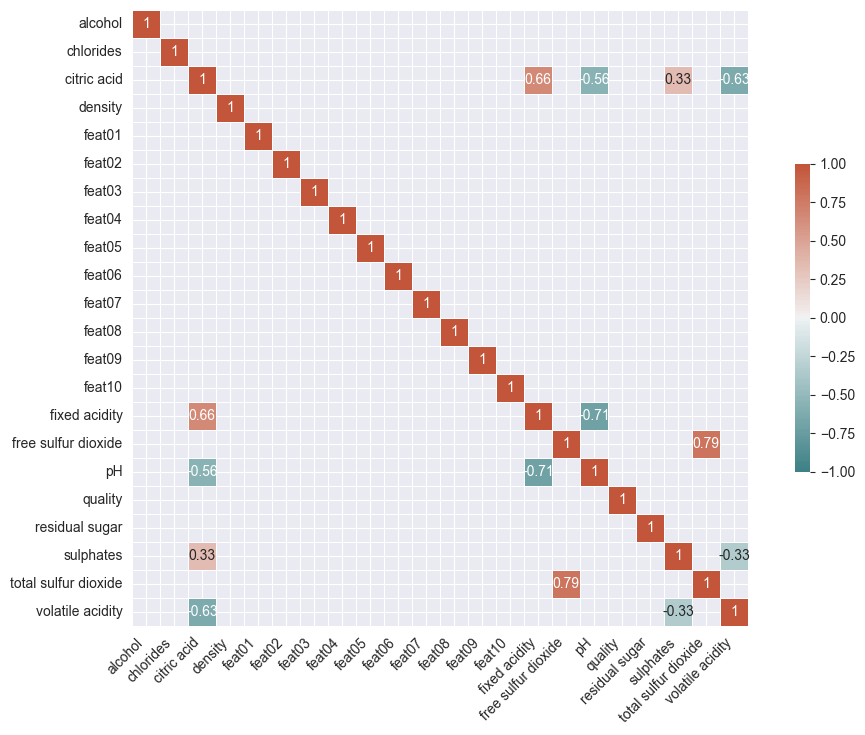

In [8]:
corr = data.corr(method = 'spearman')
mask = np.abs(corr) < 0.3

plt.figure(figsize=(12, 8))

cmap = sns.diverging_palette(200, 20, n=200)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)  

plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)  

plt.show()

We can observe that some of the variables are highly correlated. However, most of the strong relationships can be easily explained. For example, pH is negatively correlated with fixed acidity, which is obvious knowing elementary chemistry. Also, free sulfur dioxide and total sulfur dioxide are highly correlated because both are forms of sulfur. One thing I wouldn't be so sure about is the negative correlation between volatile acidity and citric acid. The negative relationship is interesting, as both are acids; however, I don't have enough knowledge to state whether it is correct or not, thus I'll leave it for now.

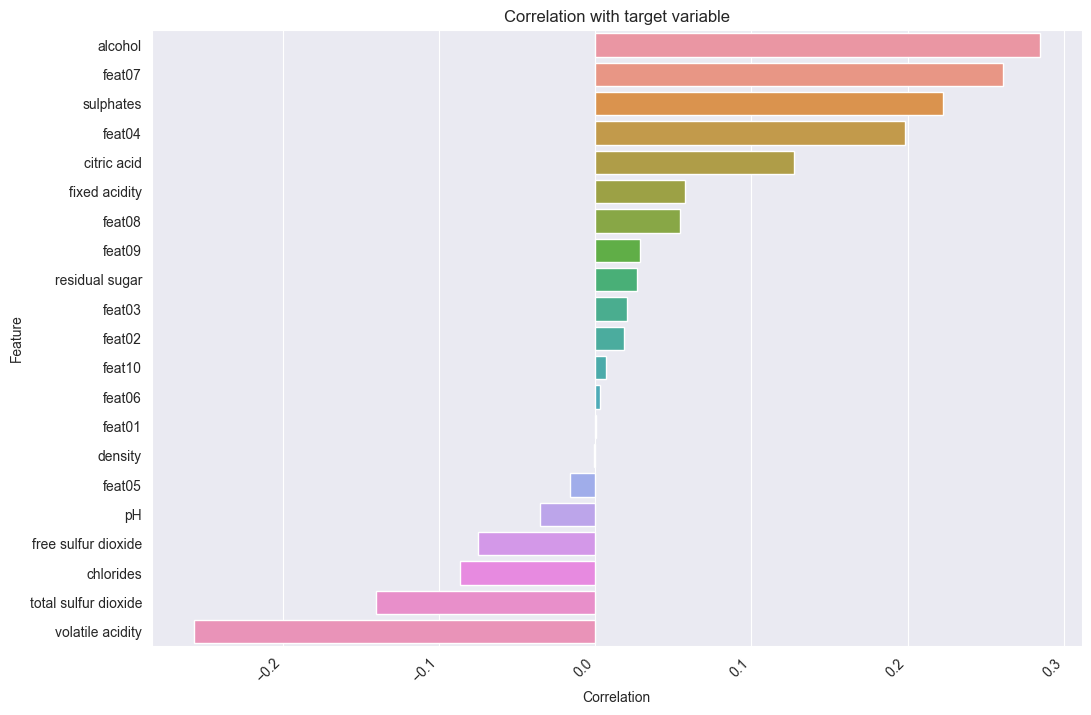

alcohol                 0.284371
feat07                  0.261159
sulphates               0.222723
feat04                  0.198512
citric acid             0.127275
fixed acidity           0.057596
feat08                  0.053978
feat09                  0.028368
residual sugar          0.026766
feat03                  0.020531
feat02                  0.018561
feat10                  0.006890
feat06                  0.003065
feat01                  0.000596
density                -0.000885
feat05                 -0.016208
pH                     -0.035420
free sulfur dioxide    -0.075016
chlorides              -0.086420
total sulfur dioxide   -0.140565
volatile acidity       -0.256779
Name: quality, dtype: float64


In [9]:
correlation_series = data.corr(method = 'spearman')['quality']
correlation_series = correlation_series.drop('quality').sort_values(ascending=False)

plt.figure(figsize=(12, 8))

sns.barplot(x=correlation_series.values, y=correlation_series.index)

plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)

plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation with target variable')

plt.show()
print(correlation_series)

Interestingly, feat 04 and feat 07 are strongly and positively correlated with target variable   

Let's look at the distributions.
    

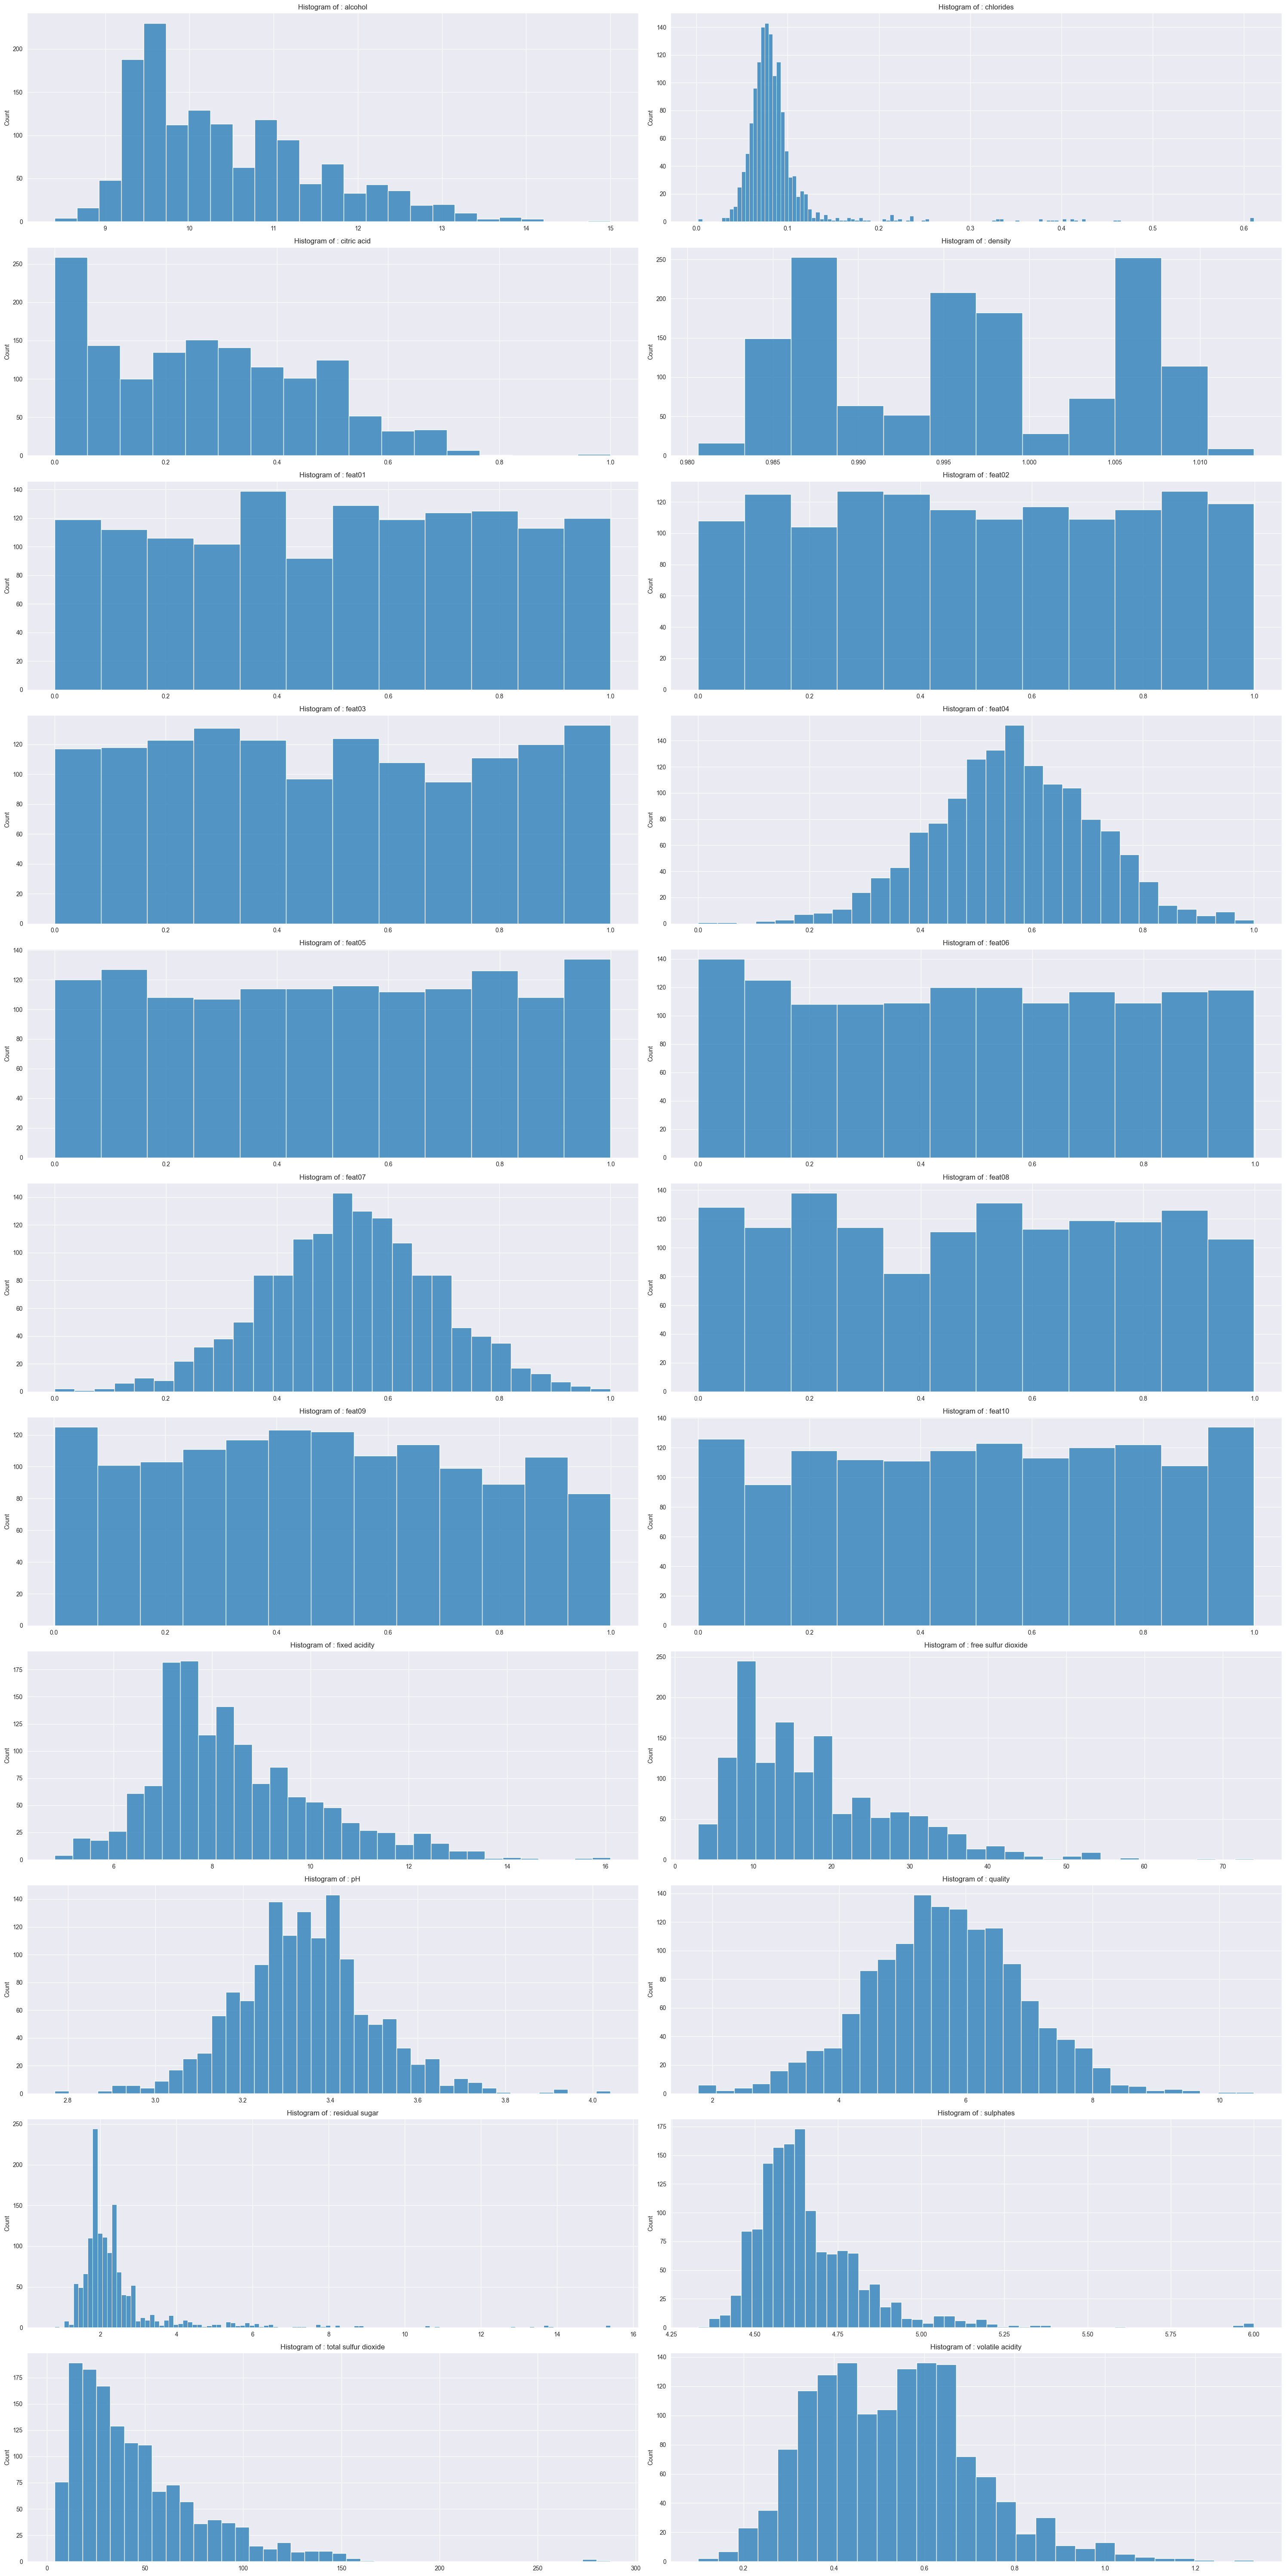

In [10]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(30, 60))
for i, ax in zip(data, axes.flat):
    sns.histplot(x=data[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.tight_layout()
plt.show()

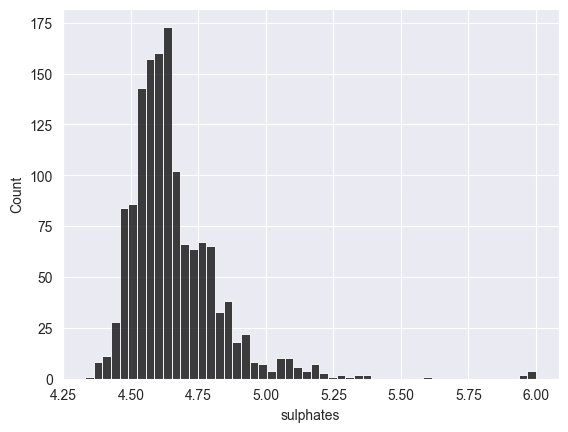

In [22]:
sns.histplot(x=data['sulphates'], color='black')
plt.show()

Interestingly again, feat 04 and feat 07 stand out from additional variables because they have a distribution close to normal, while other additional features look like a random values uniformely distributed. Looking at remaining features, we can observe that most of them is right skewed. Good approach is to apply logarithmic transformations to decrease the impact of outliers. Also we can try to scale our data and find out which approach gives better results (tree-based modes do not require scaling, but it might be the case that our 10 additional features that have identical scale may influence the model)

Let's take a look at boxplots.

In [11]:
df_copy = data.copy()

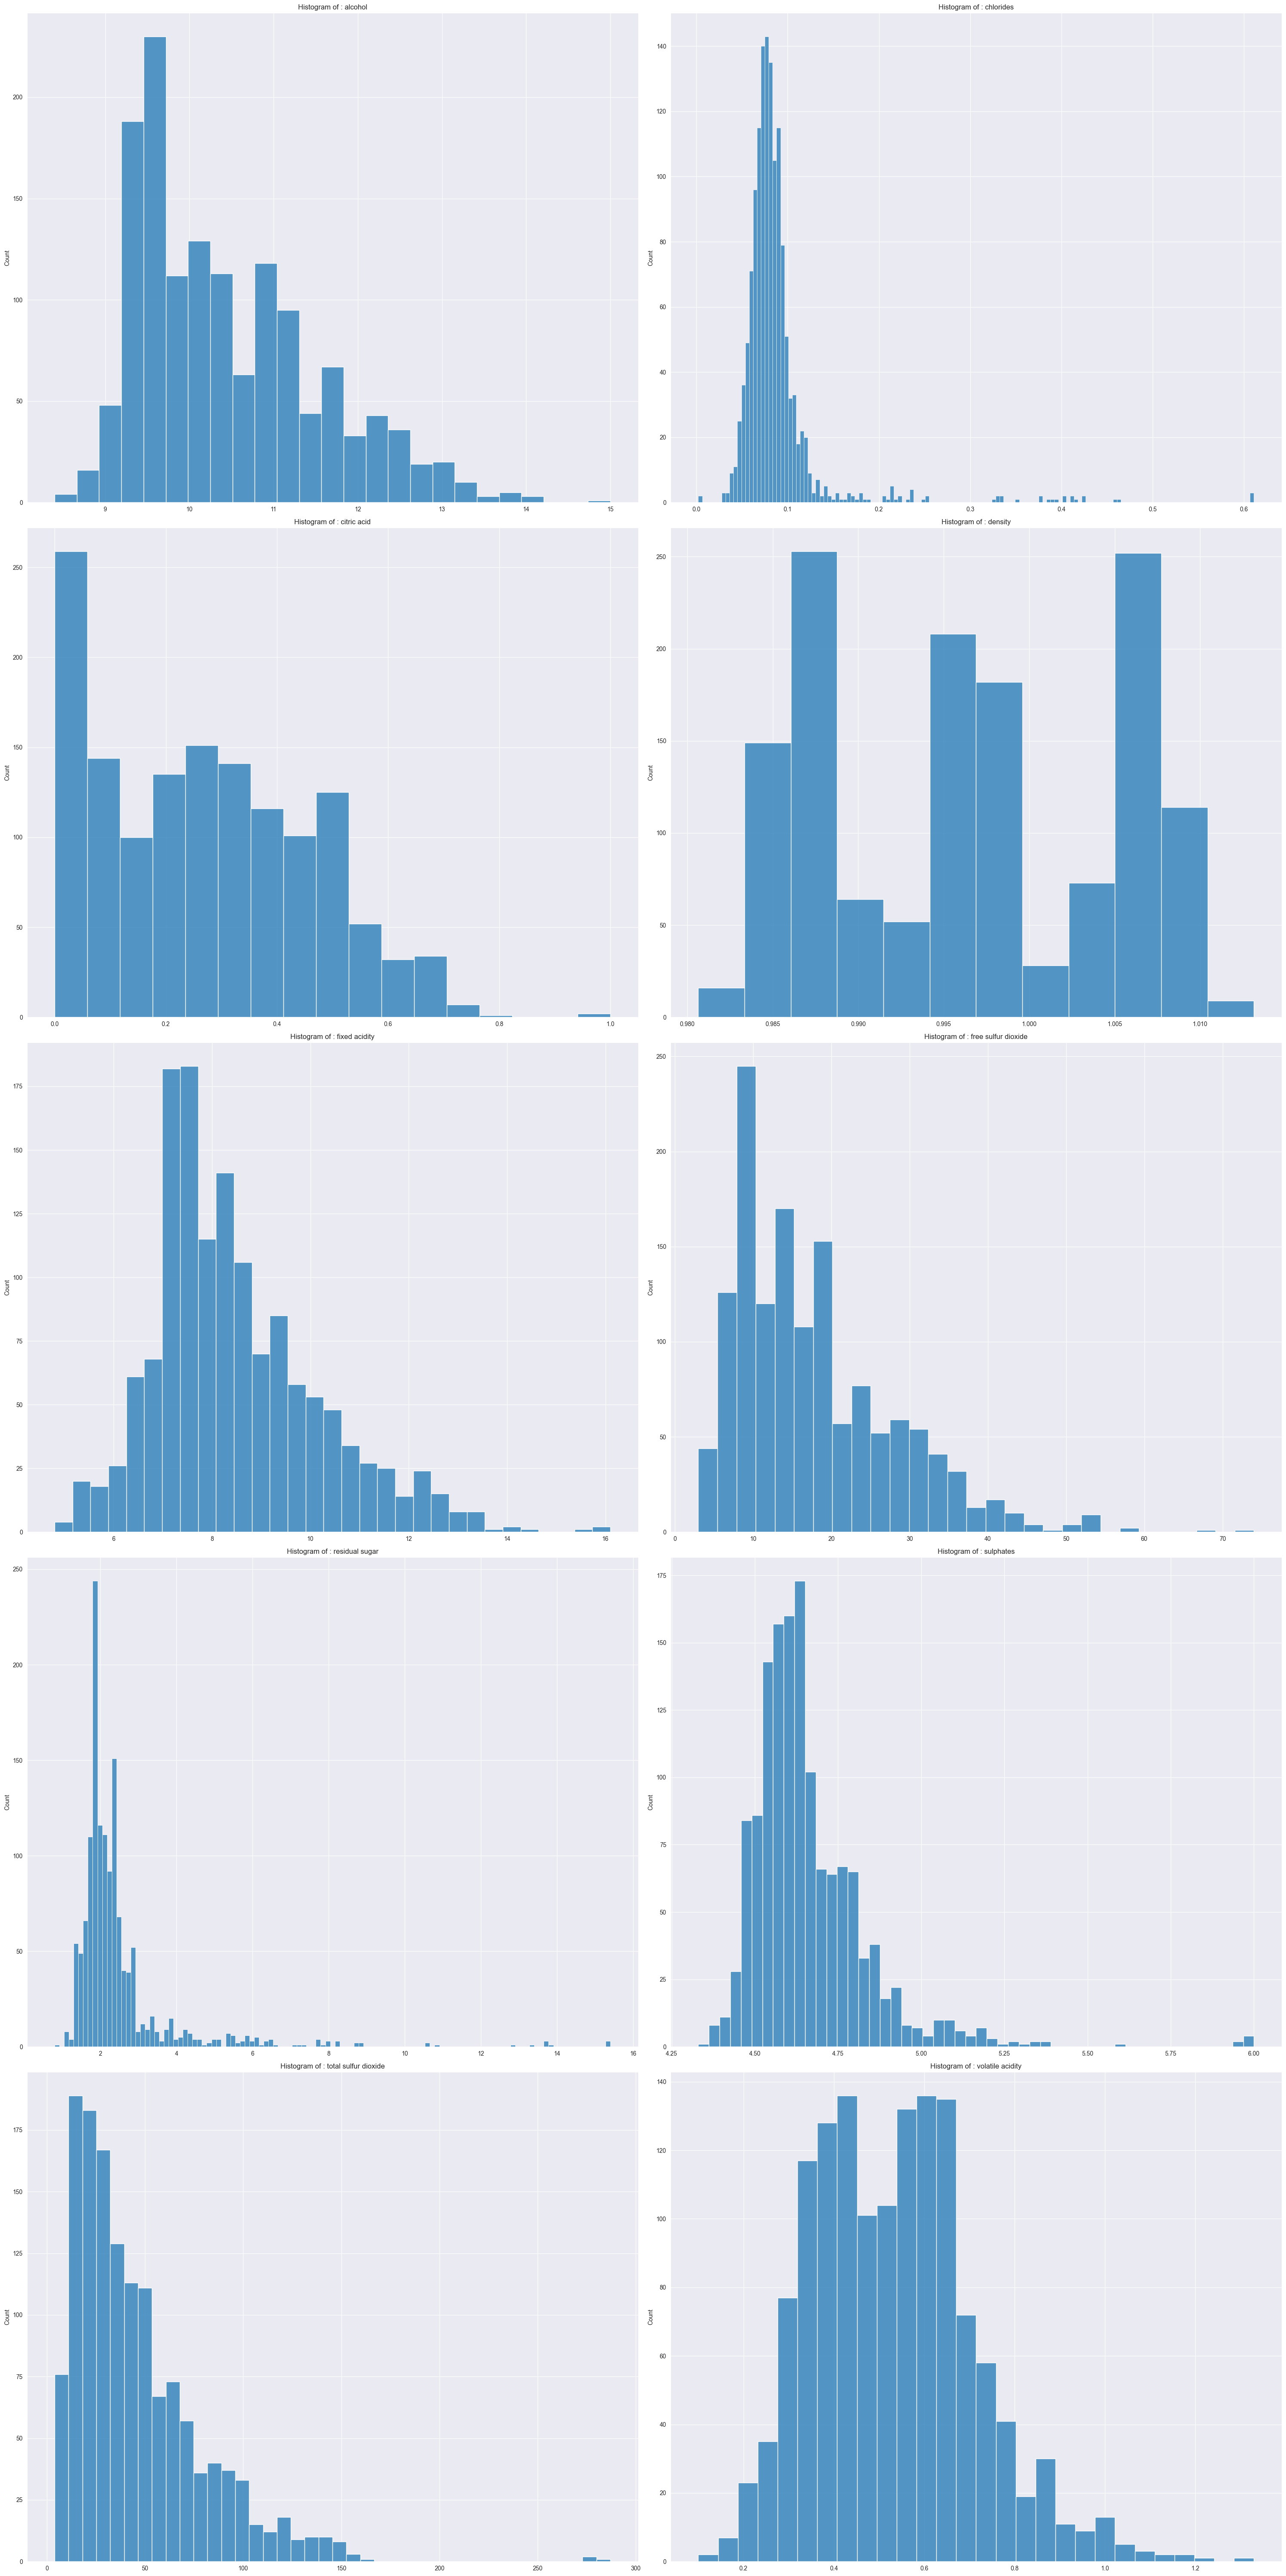

In [12]:
from sklearn.preprocessing import power_transform


log_transform_cols = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'sulphates', 'total sulfur dioxide','volatile acidity']
power_transform(df_copy[log_transform_cols], method='yeo-johnson', standardize=False)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 60))
for i, ax in zip(log_transform_cols, axes.flat):
    sns.histplot(x=df_copy[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.tight_layout()
plt.show()

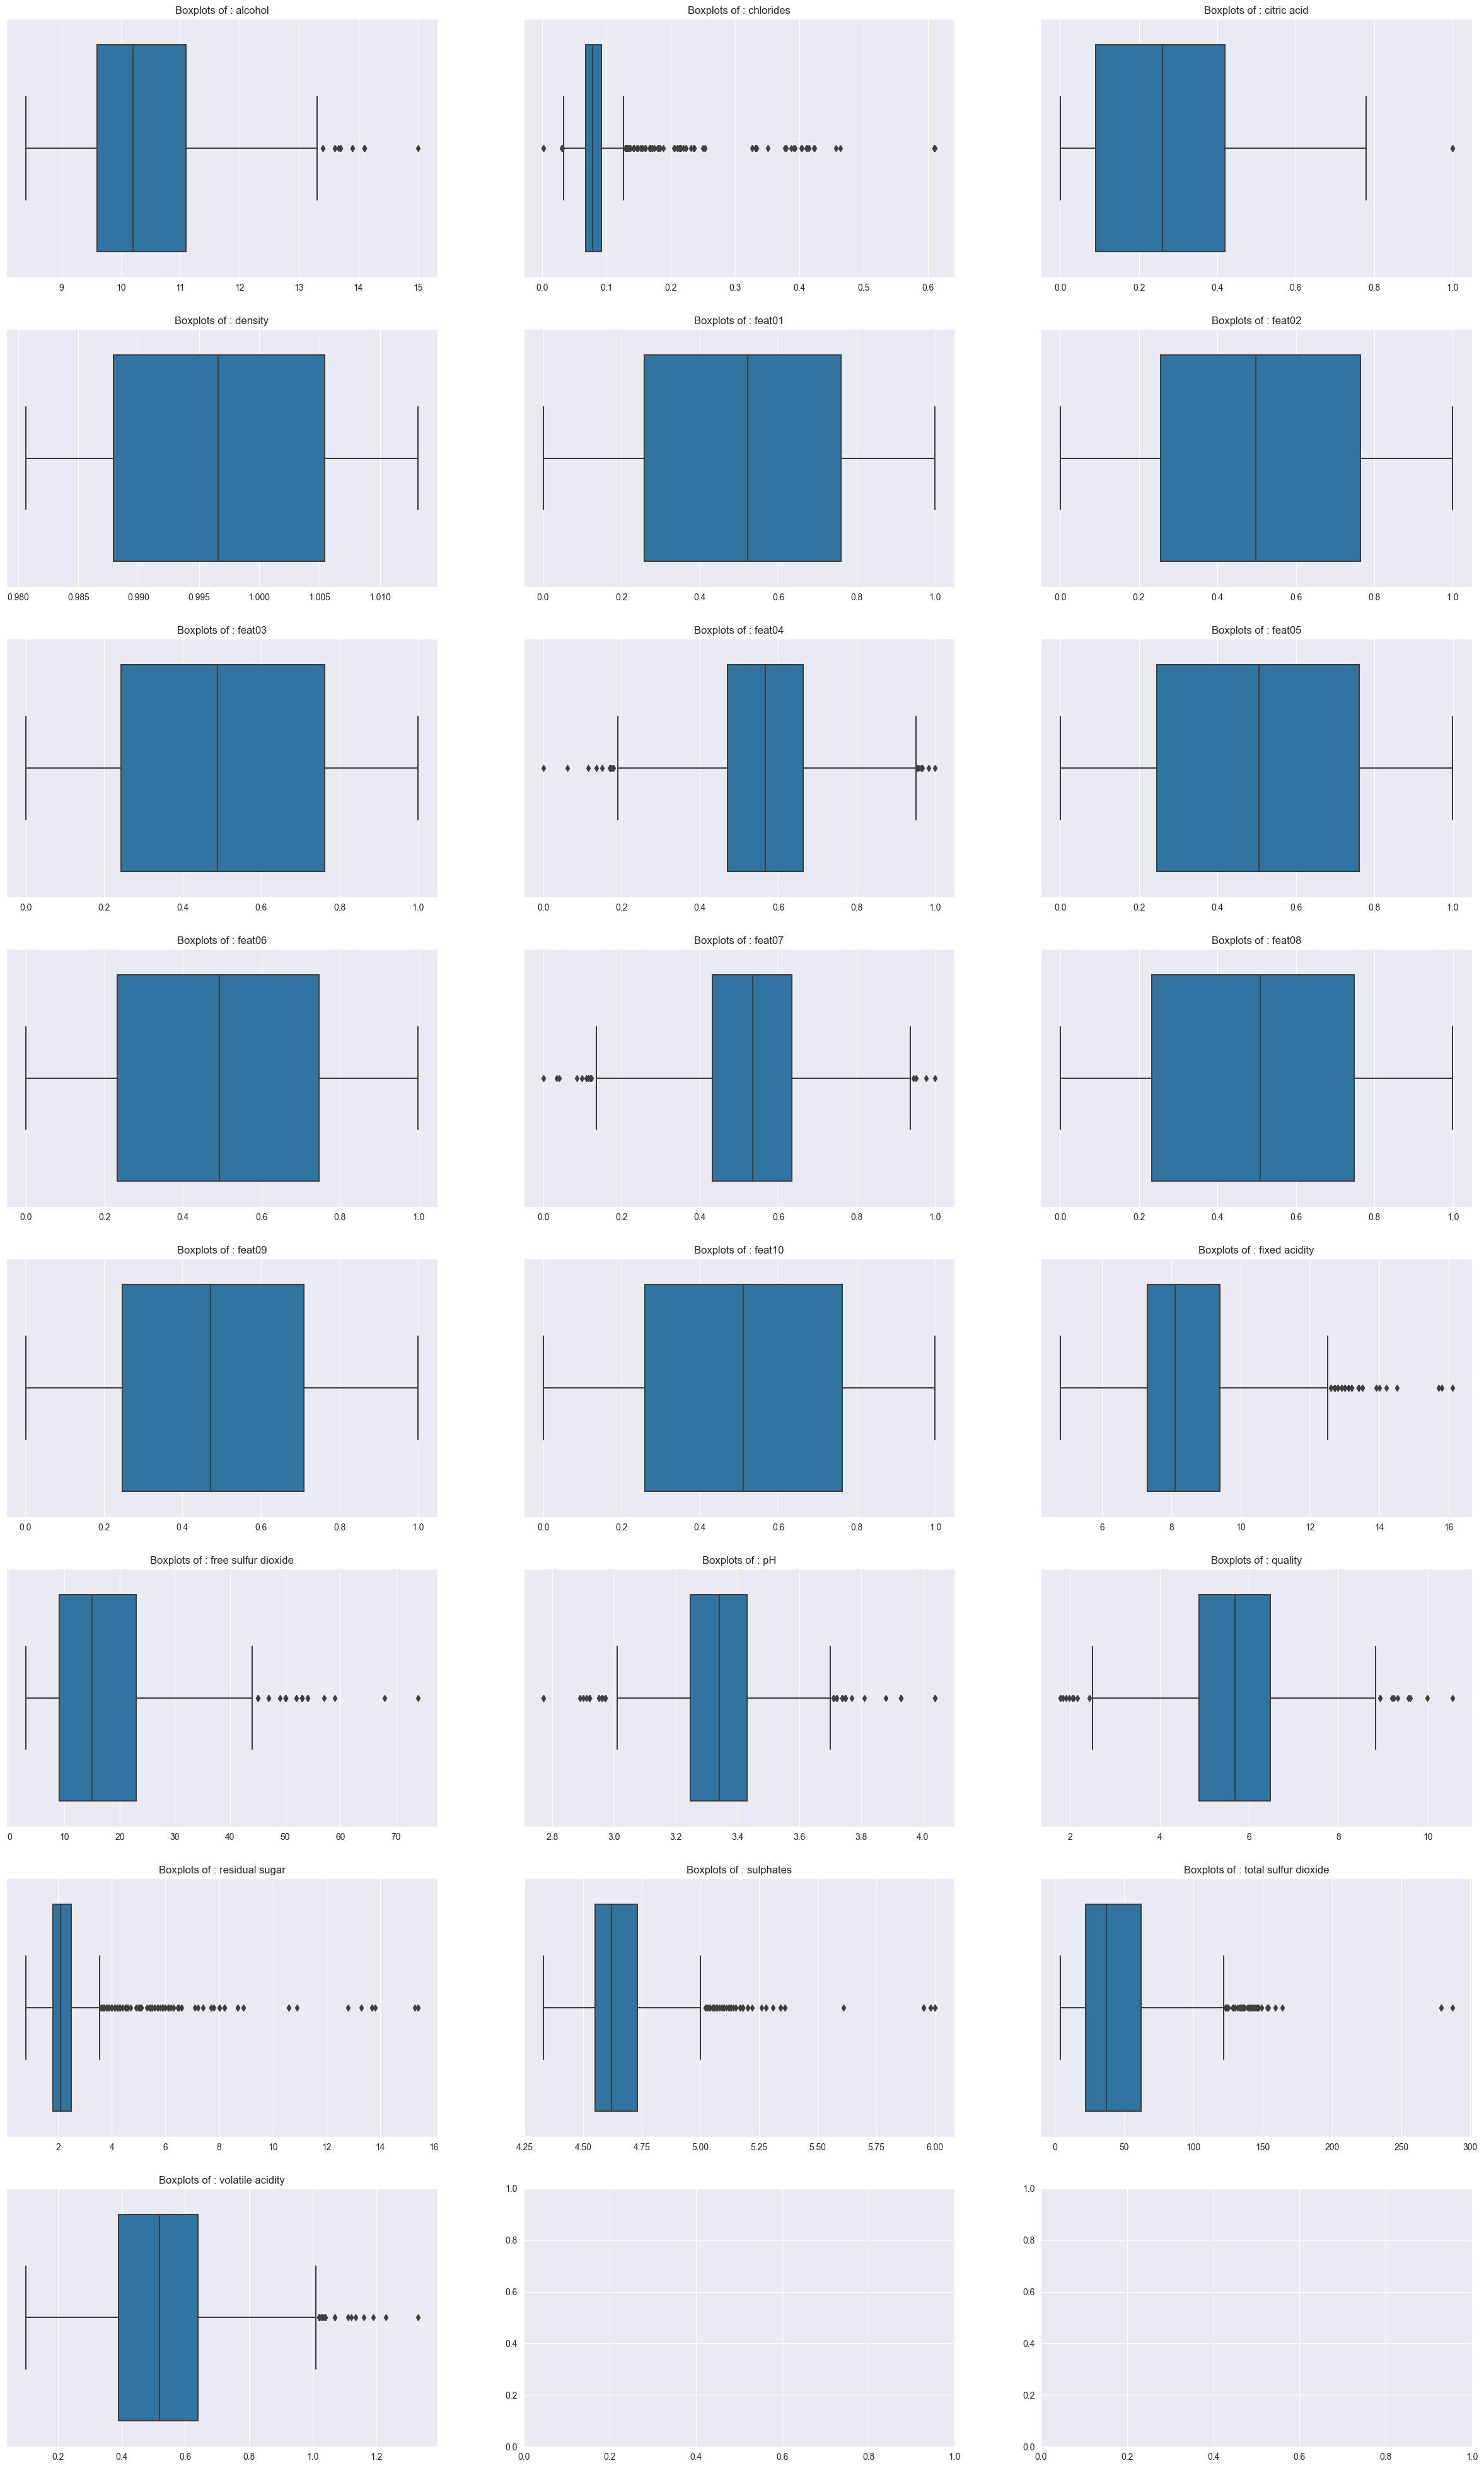

In [13]:
fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(30, 50))
for i, ax in zip(data, axes.flat):
    sns.boxplot(x=data[i], ax=ax).set(title=f"Boxplots of : {i}", xlabel="")
plt.show()

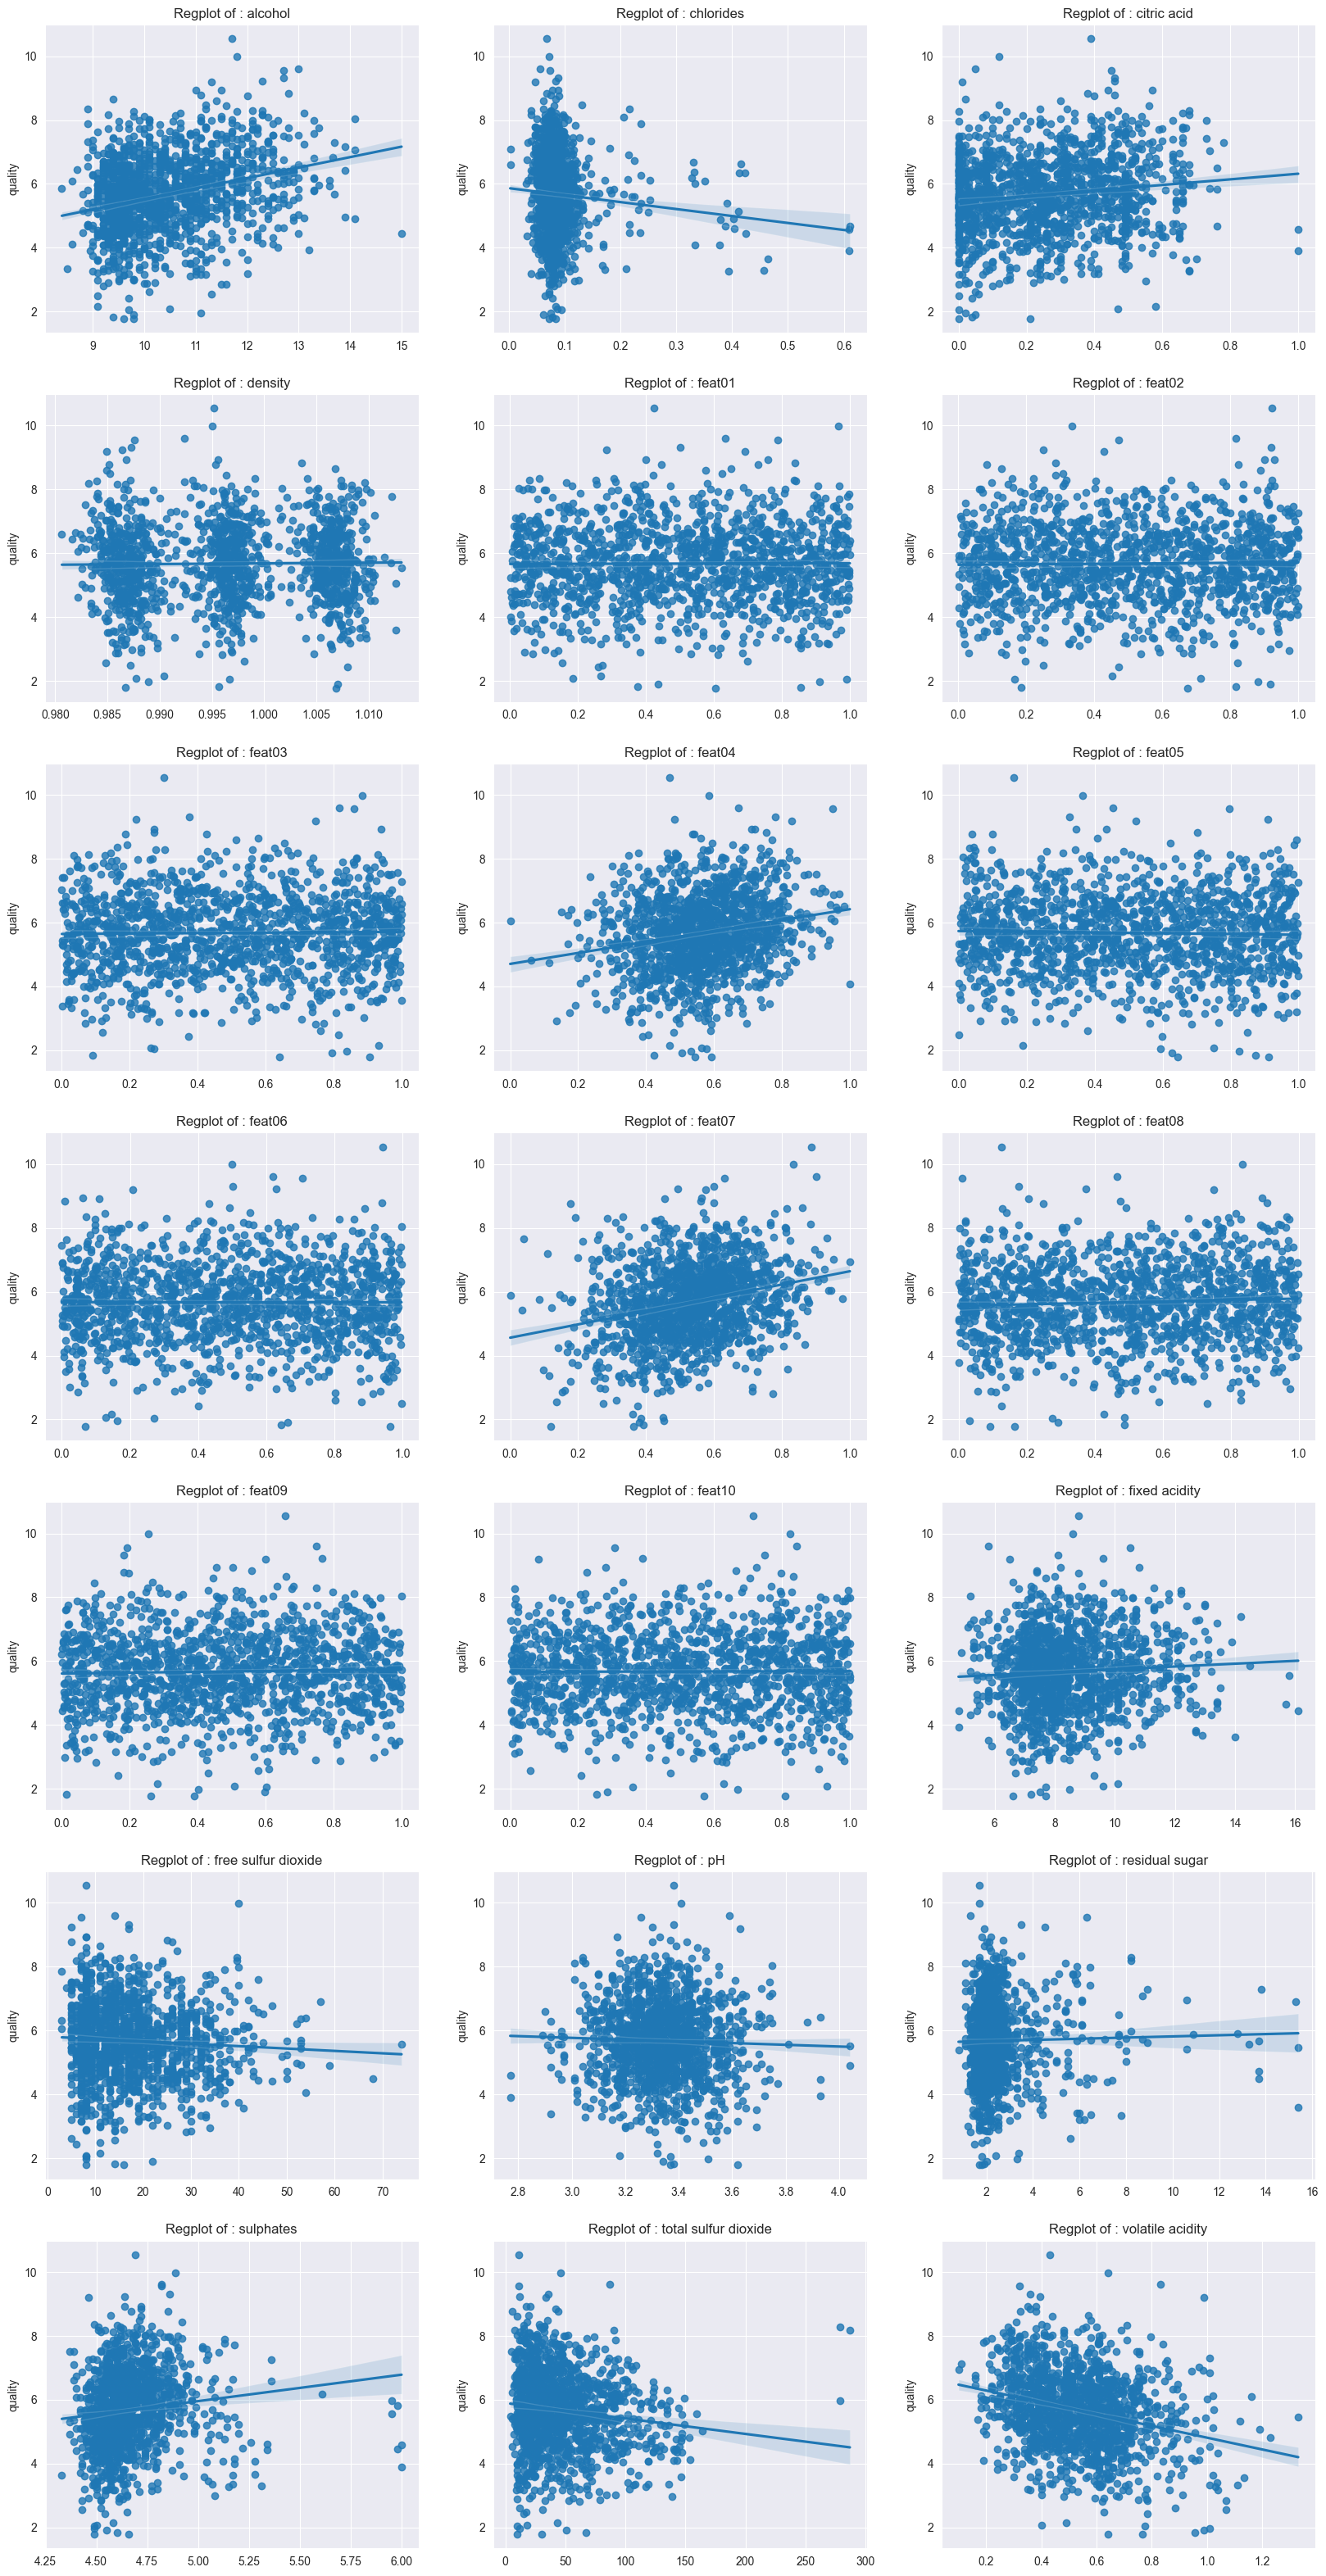

In [14]:
temp_df = data.drop(['quality'], axis=1)

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(20, 40))
for i, ax in zip(temp_df.columns, axes.flat):
    sns.regplot(x=temp_df[i], y=data["quality"], ax=ax).set(title=f"Regplot of : {i}", xlabel="")
plt.show()